# Prblm 1

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed()
default = pd.read_csv(r"C:\Users\Student\Desktop\EA 6360\Assignment 3\Default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
default.shape

(10000, 4)

In [4]:
# Converting categorical values into Numerical values
default['student'] = default['student'].map({'Yes':1,'No':0})
default['default'] = default['default'].map({'Yes':1,'No':0})

In [5]:
default.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


In [6]:
default.corr()

,default,student,balance,income
default,1.000000,0.035420,0.350119,-0.019871
student,0.035420,1.000000,0.203578,-0.753985
balance,0.350119,0.203578,1.000000,-0.152243
income,-0.019871,-0.753985,-0.152243,1.000000


# a) Fit a logistic regression model that uses income and balance to predict       default.


In [7]:
X = default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = default['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.4594
Time:                        19:50:27   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

# (b) Using the validation set approach, estimate the test error of this model.

In [8]:
train, validation = train_test_split(default, test_size=0.3)

In [9]:
X = train[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = train['default']

In [10]:
model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.079420
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6997
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.4468
Time:                        19:50:27   Log-Likelihood:                -555.94
converged:                       True   LL-Null:                       -1005.0
Covariance Type:            nonrobust   LLR p-value:                9.515e-196
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4298      0.517    -22.125      0.000     -12.442     -10.417
income      2.129e-05   5.94

In [11]:
X_val = validation[['income', 'balance']]
X_val = sm.add_constant(X_val, prepend=True)
predictions = result.predict(X_val) > 0.5

In [12]:
print("Estimation for test error rate is: "
      +str((len(validation['default']) - np.sum(predictions == validation['default'])) / (len(validation['default']))))

Estimation for test error rate is: 0.026


# c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set.

In [16]:
X = np.array(default[['income','balance']].copy())
y = np.array(default['default'])

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
for split_no in range(3):
    print('split',str(split_no+1)+':')
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=split_no)
    lg_train = sm.Logit(y_train,X_train).fit()
    
    pred = lg_train.predict(X_test)
    threshold = 0.5
    pred = np.array(lg_train.predict(X_test) > threshold, dtype=float)
    validation_error = 100 - (accuracy_score(y_pred=pred,y_true=y_test)*100)
    print('{}%  test error rate from validation set approach.'.format(validation_error))
    print('-'*100)

split 1:
Optimization terminated successfully.
         Current function value: 0.162351
         Iterations 8
3.757575757575765%  test error rate from validation set approach.
----------------------------------------------------------------------------------------------------
split 2:
Optimization terminated successfully.
         Current function value: 0.181245
         Iterations 8
3.030303030303031%  test error rate from validation set approach.
----------------------------------------------------------------------------------------------------
split 3:
Optimization terminated successfully.
         Current function value: 0.186301
         Iterations 8
2.666666666666657%  test error rate from validation set approach.
----------------------------------------------------------------------------------------------------


#   
the estimated test error rates for three different splits are 3.75%,3.03%,2.66%

# (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach

In [20]:
train, validation = train_test_split(default, test_size=0.3)

X = train[['income', 'balance', 'student']]
X = sm.add_constant(X, prepend=True)
y = train['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.082480
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.4423
Time:                        19:51:52   Log-Likelihood:                -577.36
converged:                       True   LL-Null:                       -1035.3
Covariance Type:            nonrobust   LLR p-value:                3.084e-198
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4390      0.563    -18.555      0.000     -11.542      -9.336
income      3.998e-06   9.52

In [21]:
X_val = validation[['income', 'balance', 'student']]
X_val = sm.add_constant(X_val, prepend=True)
predictions = result.predict(X_val) > 0.5

print("Estimation for test error rate is: "
      +str((len(validation['default']) - np.sum(predictions == validation['default'])) / (len(validation['default']))*100))

Estimation for test error rate is: 2.3666666666666667


**Including student in the model does not improve the test erro rate much as the error rate is still 2.83 %**

#            

# Prblm 2

In [57]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import random
random.seed(100)

%matplotlib inline

In [58]:
df=pd.read_csv(r"C:\Users\Student\Desktop\EA 6360\Assignment 3\OJ.csv")
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [59]:
df.shape

(1070, 18)

In [60]:
df.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [61]:
df.corr()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
WeekofPurchase,1.000000,0.096046,0.704324,0.576872,0.365722,0.242334,0.107866,0.070688,0.192897,0.101719,0.201256,-0.011610,0.223533,0.355047,0.053038,-0.053652
StoreID,0.096046,1.000000,0.020815,0.093344,0.333182,0.010619,0.379360,-0.171641,0.237333,0.040655,-0.258172,0.174144,0.014302,0.334715,0.096913,-0.531597
PriceCH,0.704324,0.020815,1.000000,0.616402,0.151900,0.116310,-0.099056,-0.018026,0.077793,0.229383,0.586716,-0.096335,0.099157,0.134601,-0.177935,0.399570
PriceMM,0.576872,0.093344,0.616402,1.000000,0.065206,-0.001246,-0.031281,-0.068340,0.115570,0.532859,0.384941,0.292594,-0.021747,0.059964,0.665187,0.106612
DiscCH,0.365722,0.333182,0.151900,0.065206,1.000000,0.018035,0.534775,-0.046952,0.139400,0.019416,-0.711274,0.393615,0.014718,0.999022,-0.062551,-0.243812
DiscMM,0.242334,0.010619,0.116310,-0.001246,0.018035,1.000000,0.156636,0.465792,-0.020292,-0.846868,0.067940,-0.823908,0.998793,0.018521,-0.111848,-0.125917
SpecialCH,0.107866,0.379360,-0.099056,-0.031281,0.534775,0.156636,1.000000,-0.154170,0.137058,-0.149182,-0.508586,0.129713,0.160750,0.549015,0.054838,-0.321847
SpecialMM,0.070688,-0.171641,-0.018026,-0.068340,-0.046952,0.465792,-0.154170,1.000000,-0.088246,-0.430499,0.025648,-0.414135,0.466546,-0.051138,-0.068311,-0.083691
LoyalCH,0.192897,0.237333,0.077793,0.115570,0.139400,-0.020292,0.137058,-0.088246,1.000000,0.078631,-0.058887,0.104261,-0.022460,0.138684,0.070659,-0.103126
SalePriceMM,0.101719,0.040655,0.229383,0.532859,0.019416,-0.846868,-0.149182,-0.430499,0.078631,1.000000,0.147222,0.852798,-0.856749,0.016216,0.448395,0.163248


# **(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations**

In [62]:
train_sample_indx = np.random.choice(np.arange(len(df)), size=800, replace=False)
train = df.loc[train_sample_indx]

test_sample_indx = [i for i in df.index if i not in train_sample_indx]
test = df.loc[test_sample_indx]

In [63]:
print("Shape of Testing dataset :",test.shape)
print("Shape of trainig dataset :",train.shape)

Shape of Testing dataset : (270, 18)
Shape of trainig dataset : (800, 18)


# **(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?**

In [64]:
# 
train['Store7'] = train.Store7.map(lambda x:1 if x=='Yes' else 0)
test['Store7'] = test.Store7.map(lambda x:1 if x=='Yes' else 0)

X_train = np.array(train[train.columns[1:]])
y_train = np.array(train.Purchase.map(lambda x:1 if x=='CH' else 0))

X_test = np.array(test[test.columns[1:]])
y_test = np.array(test.Purchase.map(lambda x:1 if x=='CH' else 0))

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

In [66]:
clf = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
tree_score = clf.score(X_train, y_train)


print('training error: {}'.format(100 - (100*np.around(clf.score(X_train, y_train), 3))))
print('terminal nodes does the tree',clf.tree_.n_leaves)
print('-'*100)

training error: 16.400000000000006
terminal nodes does the tree 8
----------------------------------------------------------------------------------------------------


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [68]:
y_pred = clf.predict(X_test)

class_mat = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(class_mat)

     No  Yes
No   78   28
Yes  31  133


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       109
           1       0.81      0.83      0.82       161

    accuracy                           0.78       270
   macro avg       0.77      0.77      0.77       270
weighted avg       0.78      0.78      0.78       270



# **(c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.**

In [70]:
text_representation = tree.export_text(clf)

print(text_representation)

|--- feature_8 <= 0.48
|   |--- feature_8 <= 0.08
|   |   |--- class: 0
|   |--- feature_8 >  0.08
|   |   |--- feature_9 <= 2.04
|   |   |   |--- class: 0
|   |   |--- feature_9 >  2.04
|   |   |   |--- class: 0
|--- feature_8 >  0.48
|   |--- feature_11 <= -0.39
|   |   |--- feature_8 <= 0.76
|   |   |   |--- class: 0
|   |   |--- feature_8 >  0.76
|   |   |   |--- class: 1
|   |--- feature_11 >  -0.39
|   |   |--- feature_8 <= 0.70
|   |   |   |--- feature_11 <= 0.27
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  0.27
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.70
|   |   |   |--- class: 1



In [71]:
# Sabving text representation
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

# **(d) Create a plot of the tree, and interpret the results.**

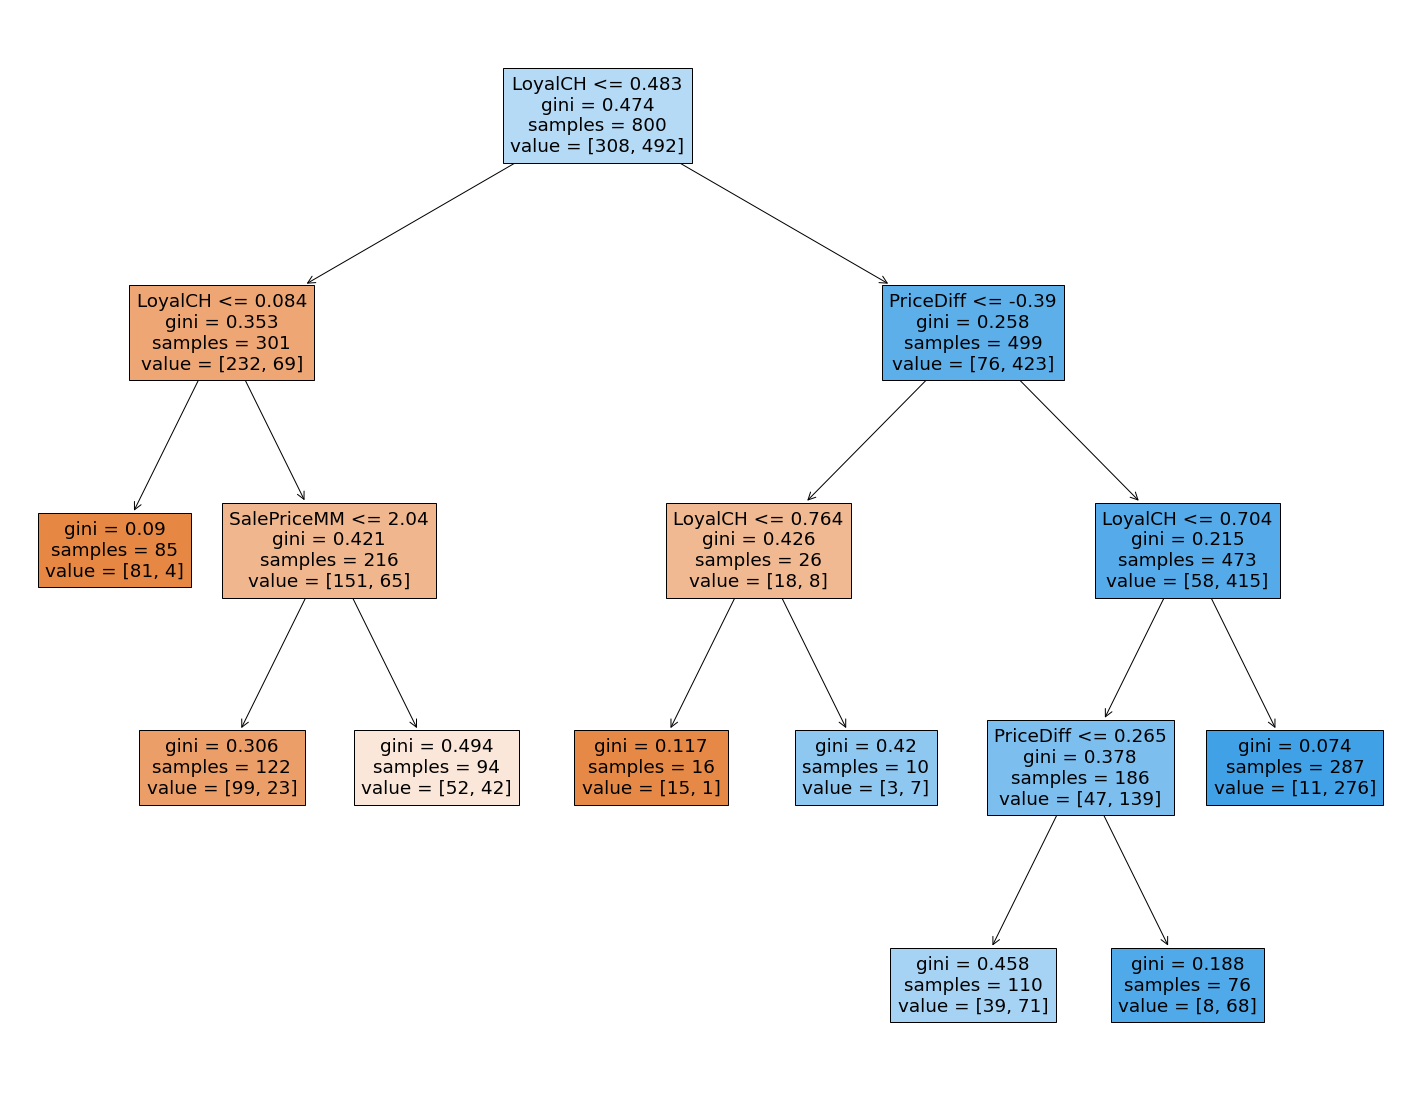

In [72]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=train.columns[1:],filled=True)

In [73]:
from io import StringIO
import pydotplus

In [74]:
from IPython.display import Image  

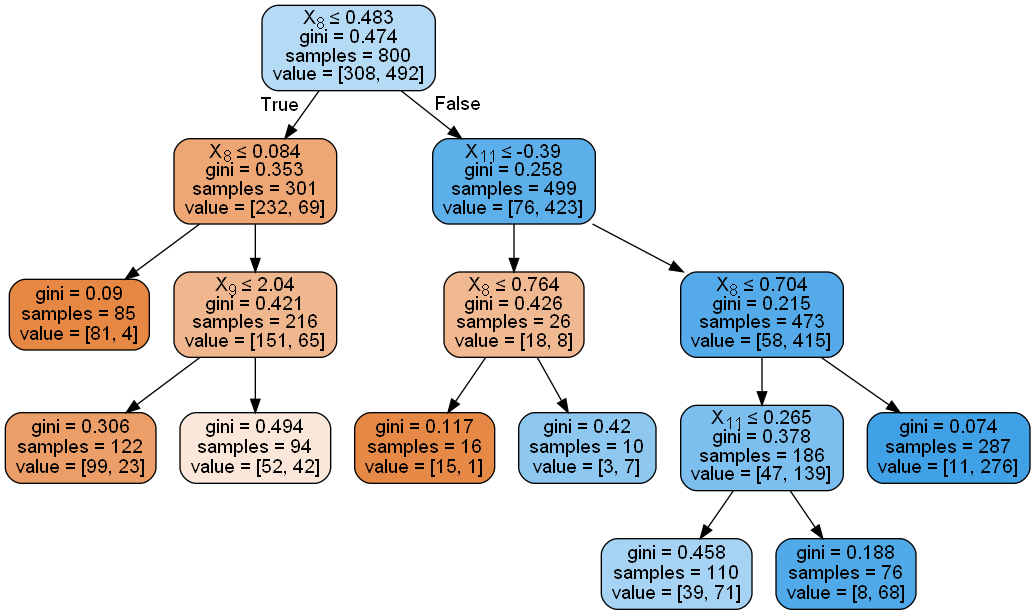

In [75]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# **(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?**

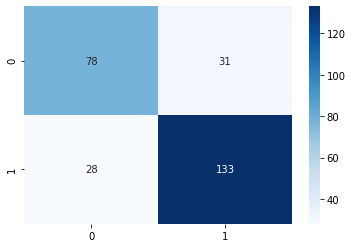

In [76]:
pred = clf.predict(X_test)

cm = confusion_matrix(y_pred=pred,y_true=y_test)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
plt.show()

In [77]:
print('test error rate of decision tree model:',100 - (100 * accuracy_score(y_test,pred)))

test error rate of decision tree model: 21.851851851851862


# **(f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.**

In [78]:
folds = 10

outputs = []
for node in np.arange(2, 50):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=node)
    score = cross_val_score(clf, X_train, y_train, cv=folds)
    outputs.append([node, np.mean(score)])



df_plot = pd.DataFrame(np.asarray(outputs), columns=['Leaves', 'Test']).set_index('Leaves')

print('Optimal Tree Size:')
print(df_plot['Test'][df_plot['Test'] == df_plot['Test'].max()])

Optimal Tree Size:
Leaves
4.0    0.825
5.0    0.825
Name: Test, dtype: float64


# **(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.**

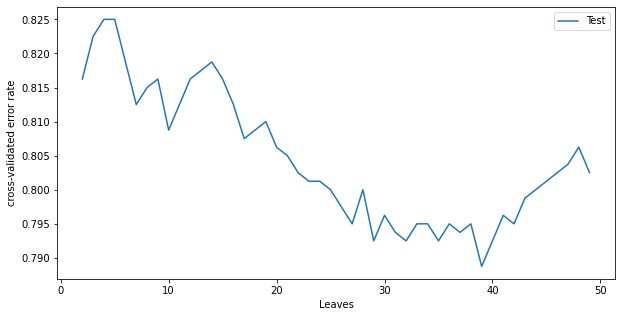

In [79]:
plt.figure(figsize=(10,5))
df_plot = pd.DataFrame(np.asarray(outputs), columns=['Leaves', 'Test']).set_index('Leaves')
sns.lineplot(data=df_plot);
plt.ylabel('cross-validated error rate')
plt.show();

# **(h) Which tree size corresponds to the lowest cross-validated classification error rate?**

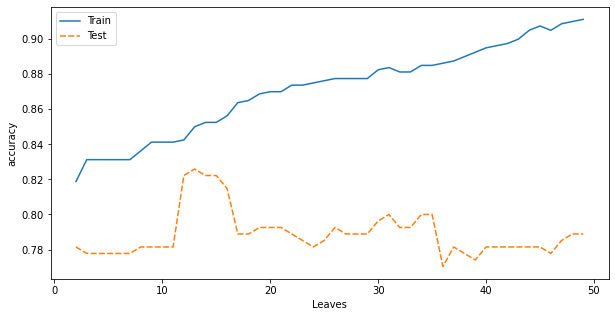

Optimal tree size:
Leaves
13.0    0.825926
Name: Test, dtype: float64


In [80]:
outputs = []
for node in np.arange(2, 50):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=node).fit(X_train, y_train)

    accuracy_train = clf.score(X_train, y_train)  
    accuracy_test = clf.score(X_test, y_test)  
    outputs += [[node, accuracy_train, accuracy_test]]

plt.figure(figsize=(10,5))
df_plot = pd.DataFrame(np.asarray(outputs), columns=['Leaves', 'Train', 'Test']).set_index('Leaves')
sns.lineplot(data=df_plot);
plt.ylabel('accuracy')
plt.show();

print('Optimal tree size:')
print(df_plot['Test'][df_plot['Test'] == df_plot['Test'].max()])

# (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes

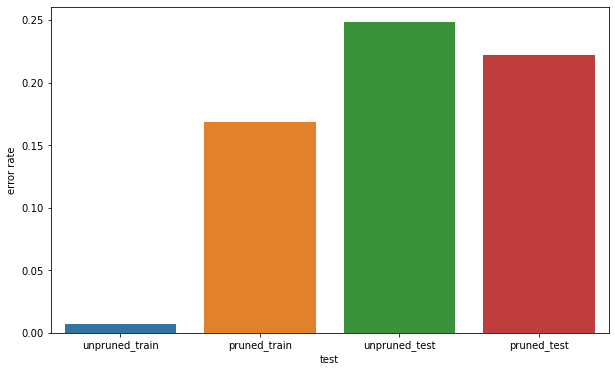

,test,error rate
0,unpruned_train,0.007500
1,pruned_train,0.168750
2,unpruned_test,0.248148
3,pruned_test,0.222222


In [81]:
clf_unpruned = tree.DecisionTreeClassifier().fit(X_train, y_train)
clf_pruned   = tree.DecisionTreeClassifier(max_leaf_nodes=7).fit(X_train, y_train)

scores = [['unpruned_train', 1 - clf_unpruned.score(X_train, y_train)],
          ['pruned_train', 1 - clf_pruned.score(X_train, y_train)],
          ['unpruned_test', 1 - clf_unpruned.score(X_test, y_test)],
          ['pruned_test', 1 - clf_pruned.score(X_test, y_test)]]

plot_df = pd.DataFrame(scores, columns=['test', 'error rate'])

plt.figure(figsize=(10, 6))
sns.barplot(x='test', y='error rate', data=plot_df)
plt.show();

display(plot_df)

# In the training scenario, the unpruned tree outperforms the pruned tree, while in the test setting, the pruned tree outperforms the unpruned tree. This indicates that the unpruned tree is overfitting the training data, which results in a low test score

# (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

# Sol: pruned tree has higher training error rate

# (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

# Sol: unpruned tree has higher testing error rate

#       

# Pblm 4

In [77]:
df=pd.read_csv(r"C:\Users\Student\Desktop\EA 6360\Assignment 3\Caravan.csv")
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [78]:
df.shape

(5822, 86)

In [79]:
df.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [80]:
df.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
MOSTYPE,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718
MAANTHUI,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166
MGEMOMV,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,0.017428,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384
MGEMLEEF,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,-0.025187,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540
MOSHOOFD,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,-0.027240,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZEILPL,0.007801,-0.006189,0.009234,0.000244,0.007099,-0.000675,0.013760,-0.023877,-0.008412,0.009711,...,-0.004607,-0.001661,-0.001840,-0.001361,0.003902,1.000000,0.091052,-0.003420,0.081689,-0.002698
APLEZIER,-0.018162,0.000666,0.000644,-0.001791,-0.020683,0.011795,0.018468,0.009417,-0.026407,-0.001566,...,-0.003797,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325
AFIETS,-0.015774,-0.020993,0.030330,0.020612,-0.017990,-0.001503,0.001906,0.025661,-0.011122,0.020921,...,0.003942,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246
AINBOED,-0.021087,0.018304,0.025907,-0.020042,-0.020997,-0.011431,0.002392,-0.009734,0.007261,-0.003420,...,0.032572,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273


# (a) Randomly split the data into training set (70%) and testing set (30%). Please provide the dimensionality of two datasets

In [82]:
X = df[df.columns[:-1]]
y = df.Purchase.map(lambda x:0 if x=='No' else 1)

In [83]:
X.shape

(5822, 85)

In [84]:
y.shape

(5822,)

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [86]:
print("Shape of the X training dataset:",X_train.shape)
print("Shape of the Y training dataset:",y_train.shape)
print("Shape of the X testing dataset:",X_test.shape)
print("Shape of the Y testing dataset:",y_test.shape)

Shape of the X training dataset: (4075, 85)
Shape of the Y training dataset: (4075,)
Shape of the X testing dataset: (1747, 85)
Shape of the Y testing dataset: (1747,)


# (b) Fit a tree model to the training set with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [98]:
clf = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

print('training error: {}'.format(100 - (100*np.around(clf.score(X_train, y_train), 3))))
print('terminal nodes does the tree',clf.tree_.n_leaves)
print('-'*100)

training error: 4.900000000000006
terminal nodes does the tree 32
----------------------------------------------------------------------------------------------------


In [99]:
y_pred = clf.predict(X_test)

class_mat = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = ['No', 'Yes'], columns = ['No', 'Yes'])
print(class_mat)

       No  Yes
No   1613  115
Yes    15    4


In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1628
           1       0.21      0.03      0.06       119

    accuracy                           0.93      1747
   macro avg       0.57      0.51      0.51      1747
weighted avg       0.88      0.93      0.90      1747



# (c) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

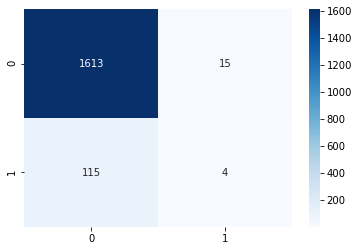

test error rate of decision tree model: 7.441327990841444


In [101]:
pred = clf.predict(X_test)

cm = confusion_matrix(y_pred=pred,y_true=y_test)
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
plt.show()

print('test error rate of decision tree model:',100 - (100 * accuracy_score(y_test,pred)))

# (d) Apply the cv.tree() function to the training set in order to determine the optimal tree size. Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis

Optimal Tree Size:
Leaves
2.0    0.943804
3.0    0.943804
4.0    0.943804
Name: Test, dtype: float64


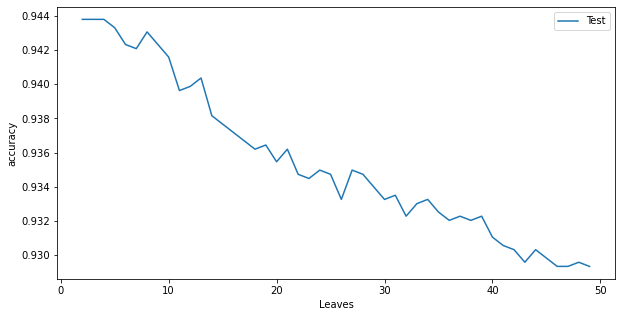

In [104]:
folds = 10

outputs = []
for node in np.arange(2, 50):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=node)
    score = cross_val_score(clf, X_train, y_train, cv=folds)
    outputs.append([node, np.mean(score)])



df_plot = pd.DataFrame(np.asarray(outputs), columns=['Leaves', 'Test']).set_index('Leaves')

print('Optimal Tree Size:')
print(df_plot['Test'][df_plot['Test'] == df_plot['Test'].max()])

plt.figure(figsize=(10,5))
df_plot = pd.DataFrame(np.asarray(outputs), columns=['Leaves', 'Test']).set_index('Leaves')
sns.lineplot(data=df_plot);
plt.ylabel('accuracy')
plt.show();

# (e) Produce a pruned tree corresponding to the optimal tree size obtained using crossvalidation. Compare the training error rates between the pruned and unpruned trees.Which is higher? Compare the test error rates between the pruned and unpruned trees.Which is higher?

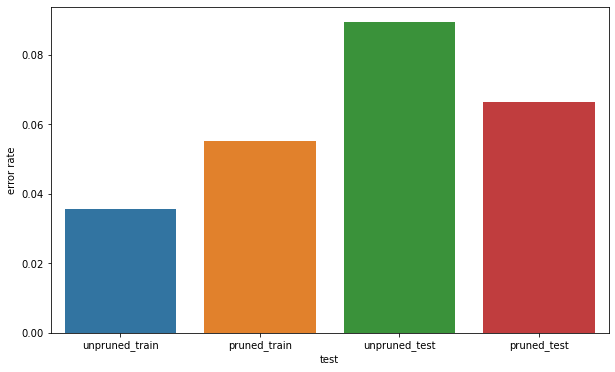

,test,error rate
0,unpruned_train,0.035583
1,pruned_train,0.055215
2,unpruned_test,0.089296
3,pruned_test,0.066400


In [105]:
clf_unpruned = tree.DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
clf_pruned   = tree.DecisionTreeClassifier(max_leaf_nodes=7).fit(X_train, y_train)

scores = [['unpruned_train', 1 - clf_unpruned.score(X_train, y_train)],
          ['pruned_train', 1 - clf_pruned.score(X_train, y_train)],
          ['unpruned_test', 1 - clf_unpruned.score(X_test, y_test)],
          ['pruned_test', 1 - clf_pruned.score(X_test, y_test)]]

plot_df = pd.DataFrame(scores, columns=['test', 'error rate'])

plt.figure(figsize=(10, 6))
sns.barplot(x='test', y='error rate', data=plot_df)
plt.show();

display(plot_df)

# 
* pruned tree has higher training error rate 
* unpruned tree has higher testing error rate 

# (f) Fit a boosting model and a random forest to the training set. The boosting model should have 1,000 trees, and a shrinkage value of 0.01. The random forest should also have 1,000 trees and the number of variables randomly sampled at each split is 10. Compare the training error rates these models, pruned and unpruned trees. Which is higher? How about the test error rates

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

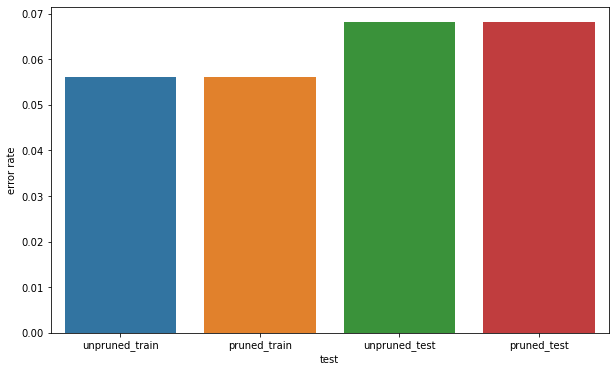

,test,error rate
0,unpruned_train,0.056196
1,pruned_train,0.056196
2,unpruned_test,0.068117
3,pruned_test,0.068117


In [93]:
clf_unpruned = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=1, random_state=0).fit(X_train, y_train)
clf_pruned   = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,max_depth=1, random_state=0).fit(X_train, y_train)

scores = [['unpruned_train', 1 - clf_unpruned.score(X_train, y_train)],
          ['pruned_train', 1 - clf_pruned.score(X_train, y_train)],
          ['unpruned_test', 1 - clf_unpruned.score(X_test, y_test)],
          ['pruned_test', 1 - clf_pruned.score(X_test, y_test)]]

plot_df = pd.DataFrame(scores, columns=['test', 'error rate'])

plt.figure(figsize=(10, 6))
sns.barplot(x='test', y='error rate', data=plot_df)
plt.show();

display(plot_df)

# 
Random Forest

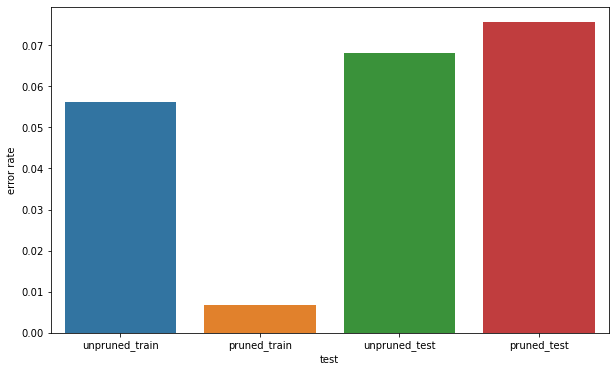

,test,error rate
0,unpruned_train,0.056196
1,pruned_train,0.006871
2,unpruned_test,0.068117
3,pruned_test,0.075558


In [94]:
from sklearn.ensemble import RandomForestClassifier
clf_unpruned = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
clf_pruned   = RandomForestClassifier(n_estimators=1000,max_features=10).fit(X_train, y_train)

scores = [['unpruned_train', 1 - clf_unpruned.score(X_train, y_train)],
          ['pruned_train', 1 - clf_pruned.score(X_train, y_train)],
          ['unpruned_test', 1 - clf_unpruned.score(X_test, y_test)],
          ['pruned_test', 1 - clf_pruned.score(X_test, y_test)]]

plot_df = pd.DataFrame(scores, columns=['test', 'error rate'])

plt.figure(figsize=(10, 6))
sns.barplot(x='test', y='error rate', data=plot_df)
plt.show();

display(plot_df)

# (g) Which predictors appear to be the most important in the boosting model (Top 10)?Which predictors are important in the random forest model?

In [106]:
random_forest   = RandomForestClassifier(n_estimators=1000,max_features=10).fit(X_train, y_train)
boosting  = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,max_depth=5, random_state=0).fit(X_train, y_train)

In [108]:
sorted(list(zip(X_train.columns,random_forest.feature_importances_)),key=lambda x:x[:][1])[:10][:]

[('PVRAAUT', 1.30841235841633e-05),
 ('AVRAAUT', 1.6278627207286497e-05),
 ('PWERKT', 4.1332826281567226e-05),
 ('AWERKT', 6.310607644935706e-05),
 ('PPERSONG', 7.621831123538923e-05),
 ('APERSONG', 0.00010560259791001849),
 ('AWALAND', 0.00066283572413391),
 ('AINBOED', 0.0007924154383492322),
 ('AZEILPL', 0.0008121349427190285),
 ('PINBOED', 0.0008219228741505712)]

In [109]:
sorted(list(zip(X_train.columns,boosting.feature_importances_)),key=lambda x:x[:][1])[:10][:]

[('PPERSONG', 0.0),
 ('AVRAAUT', 1.649082528172024e-10),
 ('PVRAAUT', 2.0858552447292307e-10),
 ('APERSONG', 1.864746159194304e-09),
 ('PWERKT', 6.661475971714006e-07),
 ('AWERKT', 1.5231118799551642e-06),
 ('AWALAND', 8.14540558759918e-05),
 ('PWALAND', 0.00010580254943155863),
 ('ABESAUT', 0.0002900828723509075),
 ('ATRACTOR', 0.0003055561092434625)]